### **Установка библиотек**



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_excel ("/content/drive/MyDrive/институт/df.xlsx")

dataset.head()

,m/z,time,Intens.,SN,Res.,Area,Rel. Intens.,FWHM,bacteria
0,2179.732702,27782.293602,1286.453693,8.343603,418.594431,9096.826500,0.166818,5.207266,e.coli
1,2406.888774,29167.710513,1023.974836,6.706517,439.422831,6897.154356,0.132782,5.477387,e.coli
2,2554.387392,30032.454037,913.259223,5.981386,447.893269,6849.824611,0.118425,5.703116,e.coli
3,2688.567599,30797.642913,2496.835956,16.606438,497.055998,20313.694917,0.323771,5.408983,e.coli
4,2833.418603,31602.519114,871.368393,5.881112,438.124916,6752.947787,0.112993,6.467148,e.coli


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   m/z           2712 non-null   float64
 1   time          2712 non-null   float64
 2   Intens.       2712 non-null   float64
 3   SN            2712 non-null   float64
 4   Res.          2712 non-null   float64
 5   Area          2712 non-null   float64
 6   Rel. Intens.  2712 non-null   float64
 7   FWHM          2712 non-null   float64
 8   bacteria      2712 non-null   object 
dtypes: float64(8), object(1)
memory usage: 190.8+ KB


# **PyCaret ML**

In [ ]:
!pip install PyYAML==5.4.1

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab ()

Colab mode enabled.


In [ ]:
from pycaret.classification import *

**Текст, выделенный полужирным шрифтом**# Getting the Data

In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen =pd.read_excel ("/content/drive/MyDrive/институт/слепые данные/13.xlsx")
#data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))
data_unseen.to_csv('new_data_bacteria.csv')

In [ ]:
data_unseen

In [ ]:
data.info()

In [ ]:
exp_clf101 =setup(data, target = 'bacteria', 
            #ignore_features = ['id'],
            silent=True,
            numeric_features=['Intens.', 'SN','Res.','Area','Rel. Intens.'], session_id=543)


,Description,Value
0,session_id,543
1,Target,bacteria
2,Target Type,Binary
3,Label Encoded,"e.coli: 0, s.aur: 1"
4,Original Data,"(2576, 9)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best_model = compare_models(sort='AUC')

In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=543, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9890,0.9995,0.9873,0.9873,0.9873,0.9775,0.9775
1,0.9890,0.9995,0.9873,0.9873,0.9873,0.9775,0.9775
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9889,0.9950,0.9872,0.9872,0.9872,0.9774,0.9774
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9944,1.0000,0.9872,1.0000,0.9935,0.9887,0.9887
6,0.9944,0.9999,0.9872,1.0000,0.9935,0.9887,0.9887
7,0.9778,1.0000,0.9494,1.0000,0.9740,0.9546,0.9556
8,0.9944,1.0000,1.0000,0.9875,0.9937,0.9887,0.9888


In [ ]:
#trained model object is stored in the variable 'et'. 
print(et)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=543, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7238,0.7890,0.6329,0.7042,0.6667,0.4320,0.4338
1,0.7403,0.8093,0.6709,0.7162,0.6928,0.4683,0.4691
2,0.8564,0.9150,0.8354,0.8354,0.8354,0.7080,0.7080
3,0.7444,0.8516,0.5897,0.7667,0.6667,0.4651,0.4757
4,0.7889,0.8778,0.7436,0.7632,0.7532,0.5688,0.5690
5,0.7667,0.8292,0.6923,0.7500,0.7200,0.5205,0.5218
6,0.7222,0.7803,0.6538,0.6892,0.6711,0.4310,0.4314
7,0.7944,0.8646,0.7089,0.8000,0.7517,0.5774,0.5805
8,0.7333,0.8339,0.6203,0.7313,0.6712,0.4495,0.4538


In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9945,0.9999,1.0000,0.9875,0.9937,0.9888,0.9888
1,0.9834,1.0000,0.9620,1.0000,0.9806,0.9662,0.9667
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9944,1.0000,0.9872,1.0000,0.9935,0.9887,0.9887
6,0.9611,0.9959,0.9487,0.9610,0.9548,0.9207,0.9208
7,0.9722,0.9999,0.9367,1.0000,0.9673,0.9432,0.9447
8,0.9944,0.9999,0.9873,1.0000,0.9936,0.9887,0.9888


In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=543, verbose=0,
                       warm_start=False)


In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9669,0.9957,0.9620,0.9620,0.9620,0.9326,0.9326
1,0.9834,0.9986,0.9620,1.0000,0.9806,0.9662,0.9667
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9889,0.9957,0.9872,0.9872,0.9872,0.9774,0.9774
4,0.9889,0.9992,0.9872,0.9872,0.9872,0.9774,0.9774
5,0.9611,0.9985,0.9103,1.0000,0.9530,0.9200,0.9229
6,0.9833,0.9932,0.9872,0.9747,0.9809,0.9661,0.9662
7,0.9611,0.9964,0.9114,1.0000,0.9536,0.9203,0.9232
8,0.9889,0.9994,0.9873,0.9873,0.9873,0.9774,0.9774


In [ ]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=543, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#  Tune a Model

In [ ]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9945,0.9988,0.9873,1.0000,0.9936,0.9888,0.9888
1,0.9890,0.9993,0.9873,0.9873,0.9873,0.9775,0.9775
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9778,0.9960,0.9615,0.9868,0.9740,0.9546,0.9549
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9778,0.9995,0.9487,1.0000,0.9737,0.9545,0.9555
6,0.9778,0.9964,0.9744,0.9744,0.9744,0.9548,0.9548
7,0.9667,0.9987,0.9367,0.9867,0.9610,0.9319,0.9329
8,0.9944,0.9999,0.9873,1.0000,0.9936,0.9887,0.9888


In [ ]:
#tuned model object is stored in the variable 'tuned_et'. 
print(tuned_et)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=21, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=170, n_jobs=-1, num_leaves=150, objective=None,
               random_state=543, reg_alpha=0.1, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

In [ ]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')


###  Random Forest Classifier

In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
print(tuned_rf)

 GBC

In [ ]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9890,0.9996,0.9873,0.9873,0.9873,0.9775,0.9775
1,0.9945,0.9999,0.9873,1.0000,0.9936,0.9888,0.9888
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9889,0.9997,0.9872,0.9872,0.9872,0.9774,0.9774
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9944,1.0000,0.9872,1.0000,0.9935,0.9887,0.9887
6,0.9833,0.9992,0.9615,1.0000,0.9804,0.9659,0.9665
7,0.9778,1.0000,0.9494,1.0000,0.9740,0.9546,0.9556
8,0.9944,1.0000,1.0000,0.9875,0.9937,0.9887,0.9888


### 10.1 AUC Plot

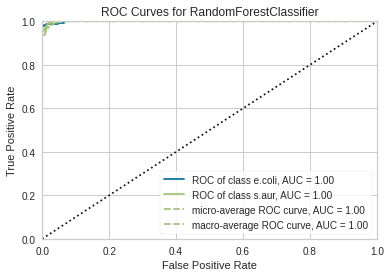

In [ ]:
plot_model(tuned_rf, plot = 'auc')

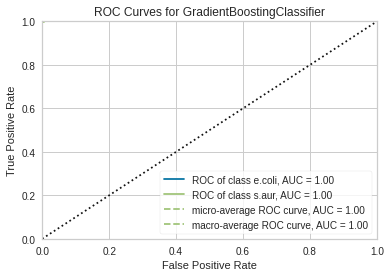

In [ ]:
plot_model(tuned_gbc, plot = 'auc')

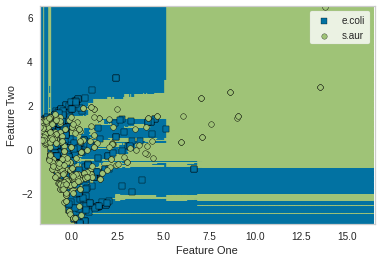

In [ ]:
plot_model(tuned_gbc, plot = 'pr')

### Feature Importance Plot

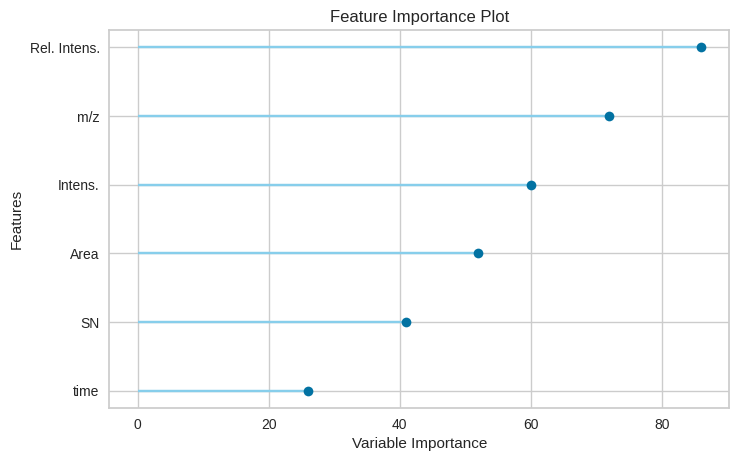

In [ ]:
plot_model(tuned_et, plot='feature')

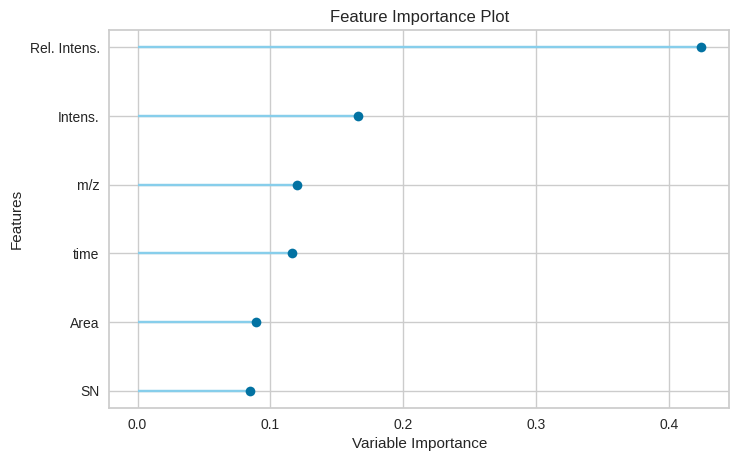

In [ ]:
plot_model(tuned_rf, plot='feature')

### Confusion Matrix

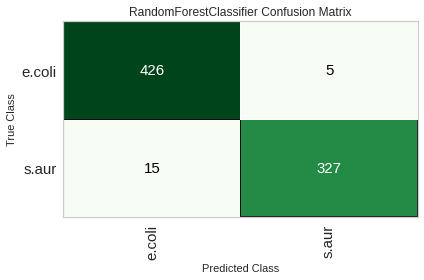

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

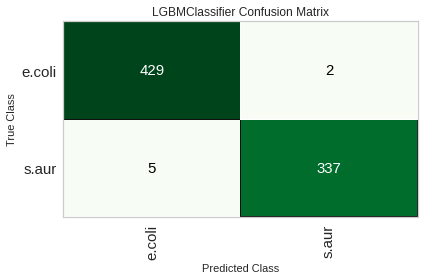

In [ ]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [ ]:
evaluate_model(tuned_et)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.4
max_depth,-1
min_child_samples,21
min_child_weight,0.001
min_split_gain,0.6
n_estimators,170


# Predict on test / hold-out Sample

In [ ]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9741,0.9992,0.9561,0.9849,0.9703,0.9474,0.9477


In [ ]:
predict_model(tuned_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9909,0.9996,0.9854,0.9941,0.9897,0.9816,0.9817


# Finalize Model for Deployment

In [ ]:
final_et = finalize_model(tuned_et)

In [ ]:
#Final Random Forest model parameters for deployment
print(final_et)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=21, min_child_weight=0.001, min_split_gain=0.6,
               n_estimators=170, n_jobs=-1, num_leaves=150, objective=None,
               random_state=543, reg_alpha=0.1, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
predict_model(final_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,m/z,time,Intens.,SN,Area,Rel. Intens.,bacteria,Label,Score
0,2050.155273,26959.470703,1275.00,3.404371,8536.590820,0.145681,e.coli,e.coli,0.8048
1,2407.335938,29169.619141,1966.50,4.433227,13727.811523,0.318668,s.aur,s.aur,0.9331
2,9548.514648,57562.812500,1937.75,32.115391,35925.089844,0.235478,e.coli,e.coli,0.9835
3,2513.536621,29794.789062,1813.50,4.149281,14097.171875,0.056395,s.aur,s.aur,0.9999
4,2328.129395,28688.363281,1500.00,6.284068,8392.631836,0.124585,s.aur,s.aur,0.9672
...,...,...,...,...,...,...,...,...,...
768,9549.150391,57564.710938,1981.00,32.229790,36153.648438,0.281033,e.coli,e.coli,0.9864
769,2181.107422,27790.888672,2202.00,8.537861,18451.693359,0.336312,e.coli,e.coli,0.9963
770,3176.709229,33426.968750,652.00,3.818664,6194.124023,0.032696,s.aur,s.aur,0.9939
771,5951.296387,45560.285156,604.00,3.061872,8178.847656,0.018783,s.aur,s.aur,0.9965


# Predict on unseen data

In [ ]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head(100)

,m/z,time,Intens.,SN,Quality Fac.,Res.,Area,Rel. Intens.,FWHM,Chi^2,Bk. Peak,Label,Score
0,2038.262931,26856.872380,2079.00,6.898979,NaN,384.828315,12560.950753,0.188315,5.296551,NaN,0.0,e.coli,0.6013
1,2054.375134,26961.100535,797.00,2.644775,NaN,595.581092,4550.140603,0.072192,3.449363,NaN,0.0,s.aur,0.9883
2,2070.410943,27064.428052,3433.00,11.392109,NaN,436.950932,25017.426500,0.310960,4.738315,NaN,0.0,e.coli,0.8430
3,2086.513911,27167.785027,1832.00,6.079331,NaN,347.219578,17111.825697,0.165942,6.009206,NaN,0.0,s.aur,0.6721
4,2153.991404,27596.597910,1061.00,3.605486,NaN,515.115041,5830.159828,0.096105,4.181573,NaN,0.0,s.aur,0.9334
5,2169.799007,27696.075055,2333.00,7.927990,NaN,405.273426,19680.360162,0.211322,5.353914,NaN,0.0,e.coli,0.7652
6,2185.429337,27794.079689,1939.00,6.803908,NaN,383.902399,19002.987046,0.175634,5.692669,NaN,0.0,s.aur,0.8132
7,2201.709807,27895.787547,705.00,2.473830,NaN,923.757654,3313.113084,0.063859,2.383428,NaN,0.0,s.aur,0.9962
8,2208.924905,27940.741222,749.00,2.628225,NaN,540.141346,4412.743696,0.067844,4.089531,NaN,0.0,s.aur,0.9963
9,2218.095461,27997.772168,697.00,2.445758,NaN,595.045250,3763.742732,0.063134,3.727608,NaN,0.0,s.aur,0.9957


In [ ]:
#from pycaret.utils import check_metric
#check_metric(actual=unseen_predictions['bacteria'],prediction=unseen_predictions['Label'],metric='Accuracy')

**Текст, выделенный полужирным шрифтом**# Saving the model

In [ ]:
save_model(final_et,'Final ET Model 10042022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['FWHM', 'Res.'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['Intens.', 'SN',
                                                           'time', 'Area',
                                                           'Rel. Intens.',
                                                           'm/z'],
                                       target='bacteria', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fil...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_wei

#  Loading the saved model

In [ ]:
saved_final_et = load_model('Final ET Model 10042022')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_et, data=data_unseen)

In [ ]:
new_prediction.head()

,m/z,time,Intens.,SN,Quality Fac.,Res.,Area,Rel. Intens.,FWHM,Chi^2,Bk. Peak,Label,Score
0,2038.262931,26856.872380,2079.0,6.898979,NaN,384.828315,12560.950753,0.188315,5.296551,NaN,0.0,s.aur,0.5211
1,2054.375134,26961.100535,797.0,2.644775,NaN,595.581092,4550.140603,0.072192,3.449363,NaN,0.0,s.aur,0.8452
2,2070.410943,27064.428052,3433.0,11.392109,NaN,436.950932,25017.426500,0.310960,4.738315,NaN,0.0,e.coli,0.7101
3,2086.513911,27167.785027,1832.0,6.079331,NaN,347.219578,17111.825697,0.165942,6.009206,NaN,0.0,s.aur,0.7529
4,2153.991404,27596.597910,1061.0,3.605486,NaN,515.115041,5830.159828,0.096105,4.181573,NaN,0.0,s.aur,0.7233


In [ ]:
new_prediction.to_excel('new_prediction_13.xlsx', index = False)

In [ ]:
#from pycaret.utils import check_metric
#check_metric(new_prediction['bacteria'], new_prediction['Label'], 'Accuracy')